<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import seaborn as sns
from sklearn import preprocessing

Загрузить датасет по url:


In [125]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)



Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [126]:
df.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

(array([16., 15., 16., 15., 15., 16., 15., 16., 15., 16.]),
 array([  1. ,  16.4,  31.8,  47.2,  62.6,  78. ,  93.4, 108.8, 124.2,
        139.6, 155. ]),
 <a list of 10 Patch objects>)

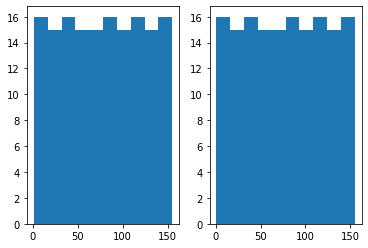

In [128]:
plt.subplot(1, 2, 1)
plt.hist(df.Freedom)
plt.subplot(1, 2, 2)
plt.hist(df['Positive affect'])

# uniform distribution

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

Среднее значение: 78.0
Медиана: 78.0
Стандартное отклонение: 44.74371464239419
Variance: 2015.0
Максимум: 155.0
Минимум: 1.0
Размах: 154.0


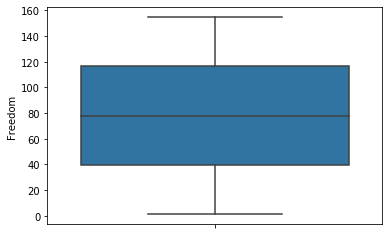

In [74]:
print(f'Среднее значение: {np.mean(df.Freedom)}')

print(f'Медиана: {np.median(df.Freedom.dropna().sort_values())}')

print(f'Стандартное отклонение: {np.std(df.Freedom)}')

print(f'Variance: {np.var(df.Freedom, ddof = 1) }')

print(f'Максимум: {np.max(df.Freedom)}')

print(f'Минимум: {np.min(df.Freedom)}')

sns.boxplot(df.Freedom, orient = 'v')     #нет выбросов

print(f'Размах: {np.max(df.Freedom) - np.min(df.Freedom)}')


Почему нельзя найти моду?

In [77]:
# print(f'Мода: {statistics.mode(df.Freedom)}')
# StatisticsError: no unique mode; found 156 equally common values

# Потому что все значения разные, а не повторяющиеся. 

np.array(df.Freedom.sort_values())

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

0.6817698430601657


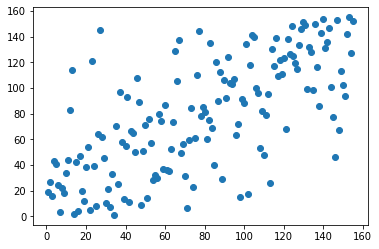

In [85]:
plt.scatter(df.Freedom, df['Positive affect'])

pr, p_value = sts.pearsonr(df.Freedom.dropna(), df['Positive affect'].dropna())
print(pr) 
# положительная зависимость

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [98]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (-1, 1))
X_train_minmax = min_max_scaler.fit_transform(np.array(df.Freedom).reshape(-1,1))
X_train_minmax



array([[-9.48051948e-01],
       [-9.35064935e-01],
       [-9.74025974e-01],
       [-9.22077922e-01],
       [-7.66233766e-01],
       [-8.70129870e-01],
       [-8.83116883e-01],
       [-9.09090909e-01],
       [-8.96103896e-01],
       [-6.75324675e-01],
       [-7.92207792e-01],
       [-8.05194805e-01],
       [ 1.94805195e-01],
       [-6.49350649e-01],
       [-1.94805195e-01],
       [-5.84415584e-01],
       [-4.41558442e-01],
       [-3.24675325e-01],
       [-2.07792208e-01],
       [-2.59740260e-01],
       [-9.61038961e-01],
       [-8.57142857e-01],
       [-9.09090909e-02],
       [-1.16883117e-01],
       [ 3.11688312e-01],
       [ 2.59740260e-01],
       [-6.88311688e-01],
       [-1.29870130e-01],
       [            nan],
       [ 2.20779221e-01],
       [-5.97402597e-01],
       [ 7.79220779e-02],
       [-6.23376623e-01],
       [-7.53246753e-01],
       [-5.19480519e-02],
       [ 7.01298701e-01],
       [-7.01298701e-01],
       [ 3.89610390e-01],
       [-3.5

Построить матрицу корреляций для всех колонок таблицы

In [104]:
df.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000000,0.539362,0.491432,0.523643,0.817842,0.546777,0.190071,0.497856,0.813367,0.816740
SD of Ladder,0.539362,1.000000,0.085381,0.619267,0.599464,0.251856,0.258639,0.392154,0.629662,0.611376
Positive affect,0.491432,0.085381,1.000000,0.389697,0.386269,0.681770,0.209659,0.354877,0.304522,0.332839
Negative affect,0.523643,0.619267,0.389697,1.000000,0.621888,0.430241,0.158903,0.338226,0.542143,0.488649
Social support,0.817842,0.599464,0.386269,0.621888,1.000000,0.448903,0.118434,0.442432,0.772912,0.740728
Freedom,0.546777,0.251856,0.681770,0.430241,0.448903,1.000000,0.381304,0.489991,0.409501,0.416263
Corruption,0.190071,0.258639,0.209659,0.158903,0.118434,0.381304,1.000000,0.266138,0.198581,0.123132
Generosity,0.497856,0.392154,0.354877,0.338226,0.442432,0.489991,0.266138,1.000000,0.478739,0.431620
Log of GDP\nper capita,0.813367,0.629662,0.304522,0.542143,0.772912,0.409501,0.198581,0.478739,1.000000,0.847580
Healthy life\nexpectancy,0.816740,0.611376,0.332839,0.488649,0.740728,0.416263,0.123132,0.431620,0.847580,1.000000


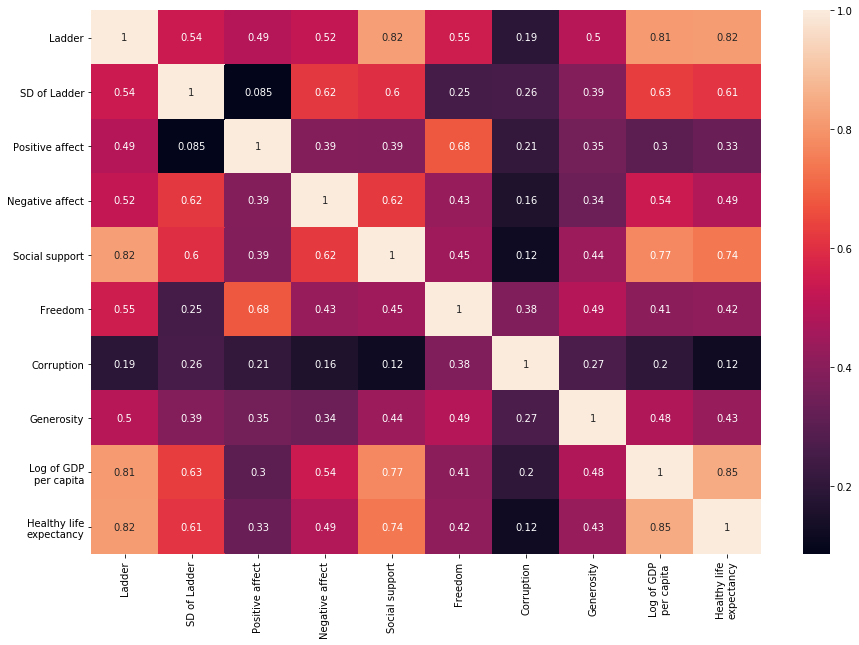

In [106]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

Загрузить таблицу цен на авокадо: 

In [130]:
df = pd.read_csv('avocado.txt')
df.head()

,index,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

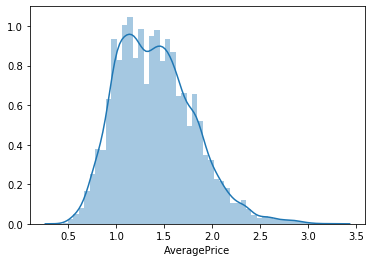

In [111]:
sns.distplot(df.AveragePrice)

# вроде и похоже на нормальную, а вроде и right skewed немного 

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

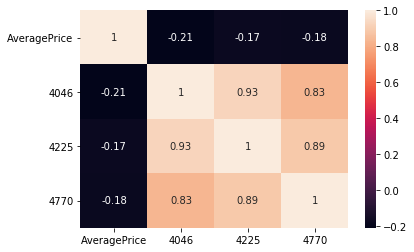

In [112]:
sns.heatmap(df[['AveragePrice', '4046', '4225', '4770']].corr(),annot=True)

#вроде и обратная зависимость, но если мы посмотрим на графики 

Text(0.5, 1.0, 'AveragePrice VS 4770')

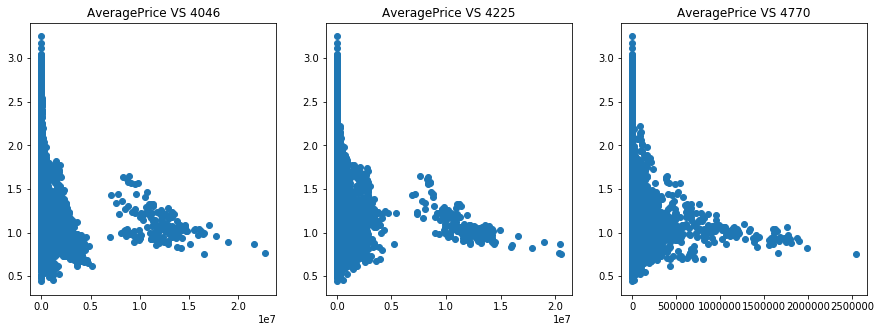

In [121]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['4046'], df.AveragePrice)
plt.title('AveragePrice VS 4046')

plt.subplot(1, 3, 2)
plt.scatter(df['4225'], df.AveragePrice)
plt.title('AveragePrice VS 4225')

plt.subplot(1, 3, 3)
plt.scatter(df['4770'], df.AveragePrice)
plt.title('AveragePrice VS 4770')



#много в этих 4046, 4225, 4770 нулей. я не понимаю, что значат эти номера и значит ли что-то ноль там,
#поэтому не уверена, что и предположить. но без них есть некоторая отрицательная зависимость
# - чем больше 4046, 4225, 4770 - тем немного меньше цена. но даже это уже после определенных значений (после 0,5 к примеру)